# Diabetes prediction using KNN algorithm  

__Context__<br/>
- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. <br/>
- The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

__Content__<br/>
- The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Import the dataset

In [129]:
import pandas as pd
diabetes = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/Assignment/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Check the shape of the dataset

In [130]:
diabetes.shape

(768, 9)

### Check the columns present in the dataset

In [131]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Count of 0 and 1 from the diabetes variable.

In [132]:
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Check the descriptive statisticss of the dataset

In [133]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Check the info of the dataset

In [134]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Q 1. Write a code to check the missing values present in the dataset. 

In [135]:
def generate():
    return diabetes.isnull().sum()# your code to know if there is any missing value or not
generate()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Q 2. Extract the dependent variables to create a dataframe X.

In [136]:
X = pd.DataFrame()
def generate():
    X=diabetes.drop(['Outcome'],axis=1) # write your code to create a dataframe of dependent variables excluding 'Outcome' variable
    return X
X = generate()

In [137]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


### Q 3. Extract the independent variable into a dataframe 'y' for model prediction.

In [138]:
y = pd.DataFrame()
def generate():
    y=diabetes.loc[:,diabetes.columns=='Outcome']   # write your code to create a dataframe which consists only of dependepent variable
    return y
y = generate()

In [139]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


### Q 4. Use StandardScaler to normalize X

In [140]:
from sklearn.preprocessing import StandardScaler
def generate():
    standardized=StandardScaler()   # Your code here
    standardized.fit(X)
    x=standardized.transform(X)
    return x #standardized X
X = generate()

In [141]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

### Q 5. Split X and y into train and test dataset using random_state = 0 and test_size as 0.25.

In [142]:
from sklearn.model_selection import train_test_split
def generate():
    return train_test_split(X,y,test_size=0.25,random_state=0)   # train test split using train_test_split of 75:25 and random state=0
X_train, X_test, y_train, y_test = generate()

### Q 5.1 Check the shape of X and y of train dataset

In [143]:
def generate():
                                # your code her
    return X_train.shape ,y_train.shape
generate()

((576, 8), (576, 1))

### Q 5.2 Check the shape of X and y of test dataset

In [144]:
def generate():
    # your code here
    return X_test.shape,y_test.shape
generate()

((192, 8), (192, 1))

### Q 6. Create a KNN model instance with n_neighbors = 1 and fit this model to the training data.

In [145]:
from sklearn.neighbors import KNeighborsClassifier
def generate():
    knn_model1=KNeighborsClassifier(n_neighbors=1)  
    knn_model1.fit(X_train,y_train)    #Your code here
    return knn_model1
knn_model1 = generate()

C:\Users\ab68523\annaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


### Q 7. Use RandomizedSearchCV  for hyperparameter tuning of your k nearest neighbor classifier. Keep n_iter as 25, random_state = 0 and  for the parameter range use the below ranges:
- "n_neighbors": range(1,30),                               
- "algorithm" : ["auto", "ball_tree"],
- "leaf_size" :  2 ** np.arange(10),
- "metric" : ["euclidean","manhattan","minkowski","chebyshev"]

In [146]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import numpy as np

def generate():
    param_dist={'n_neighbors':range(1,30),
               'algorithm':['auto','ball_tree'],
               'leaf_size':2**np.arange(10),
               'metric':['euclidean','manhathon','minkowski','chebyshev']}
                                                                      # your code here
    n_iter_Search=25
    knn_model=KNeighborsClassifier()
    return  RandomizedSearchCV(knn_model,random_state=0,param_distributions=param_dist,n_iter=n_iter_Search,n_jobs=-1)                         # your variable for RandomizedSearchCV model
knn_model2 = generate()
knn_model2.fit(X_train,y_train)

C:\Users\ab68523\annaconda\lib\site-packages\sklearn\model_selection\_search.py:741: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=25, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree'],
                                        'leaf_size': array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512], dtype=int32),
                                        'metric': ['euclidean', 'manhathon',
                                                   'minkowski', 'chebyshev'],
                                        'n_neighbors': range(1, 30)},
                   pre_dispatch='2*n_jobs', r

### Q 8.  To pick a good K Value create a for loop that trains various KNN models with different k values, then keep track of the accuracy_score for each of these models with a list. Also print out the maximum value of accuracy and the K for which it occurs. 

In [147]:
import numpy as np
from sklearn.metrics import accuracy_score
accuracy_list = []
def generate():
    for i in range(1,30):
        knn_model_=KNeighborsClassifier(n_neighbors=i)
        knn_model_.fit(X_train,y_train)
        pred_i=knn_model_.predict(X_test)
        accuracy_list.append(accuracy_score(y_test,pred_i))
        
        '''print('maximum accuracy and its value of K is :',
             max([(v,i+1) for i, v in enumerate(accuracy_list)])) 
        max([(v,i+1) for i,v in enumerate(accuracy_list)])'''
        print("Maximum accuracy and the corresponding value of k is",
          max([(v,i+1) for i,v in enumerate(accuracy_list)]),'respectively.')
    
generate()

C:\Users\ab68523\annaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\ab68523\annaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\ab68523\annaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\ab68523\annaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\ab68523\annaconda\lib\site-packages

Maximum accuracy and the corresponding value of k is (0.71875, 1) respectively.
Maximum accuracy and the corresponding value of k is (0.7395833333333334, 2) respectively.
Maximum accuracy and the corresponding value of k is (0.7395833333333334, 2) respectively.
Maximum accuracy and the corresponding value of k is (0.7708333333333334, 4) respectively.
Maximum accuracy and the corresponding value of k is (0.8072916666666666, 5) respectively.
Maximum accuracy and the corresponding value of k is (0.8072916666666666, 5) respectively.
Maximum accuracy and the corresponding value of k is (0.8072916666666666, 5) respectively.
Maximum accuracy and the corresponding value of k is (0.8072916666666666, 5) respectively.
Maximum accuracy and the corresponding value of k is (0.8072916666666666, 5) respectively.
Maximum accuracy and the corresponding value of k is (0.8072916666666666, 5) respectively.
Maximum accuracy and the corresponding value of k is (0.8072916666666666, 5) respectively.
Maximum ac

C:\Users\ab68523\annaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\ab68523\annaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\ab68523\annaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\ab68523\annaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\ab68523\annaconda\lib\site-packages

 (0.8072916666666666, 5) respectively.
Maximum accuracy and the corresponding value of k is (0.8072916666666666, 5) respectively.
Maximum accuracy and the corresponding value of k is (0.8072916666666666, 5) respectively.
Maximum accuracy and the corresponding value of k is (0.8072916666666666, 5) respectively.
Maximum accuracy and the corresponding value of k is (0.8072916666666666, 5) respectively.
Maximum accuracy and the corresponding value of k is (0.8072916666666666, 5) respectively.
Maximum accuracy and the corresponding value of k is (0.8072916666666666, 5) respectively.
Maximum accuracy and the corresponding value of k is (0.8072916666666666, 5) respectively.
Maximum accuracy and the corresponding value of k is (0.8072916666666666, 5) respectively.
Maximum accuracy and the corresponding value of k is (0.8072916666666666, 5) respectively.
Maximum accuracy and the corresponding value of k is (0.8072916666666666, 5) respectively.
Maximum accuracy and the corresponding value of k i

In [148]:
maxaccuracy=max(accuracy_list)
maxK=accuracy_list.index(maxv)
print('maximum accuracy corresponding to value of K :', (maxaccuracy, maxK+1),'respectively')

maximum accuracy corresponding to value of K : (0.8072916666666666, 5) respectively


### Q 9.  Plot Accuracy of model at various k values and find the best value of k.

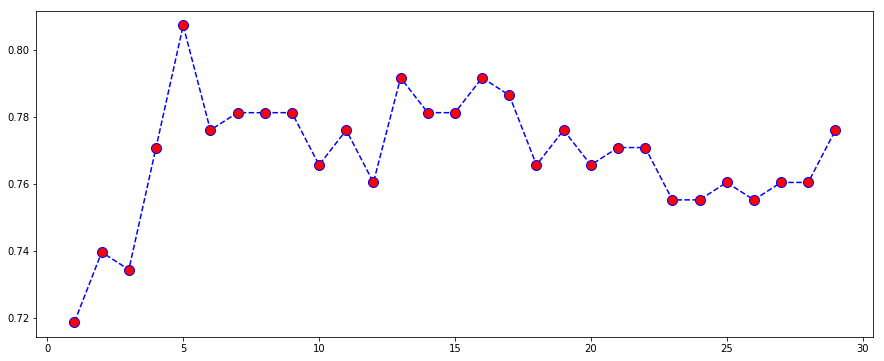

In [149]:
import matplotlib.pyplot as plt
%matplotlib inline
def generate():
    plt.figure(figsize=(15,6))
    plt.plot(range(1,30),accuracy_list,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
    return
generate()

### Q 10. Create KNN model instance with n_neighbors = 8 and fit this model to the training data.

In [150]:
from sklearn.neighbors import KNeighborsClassifier
def generate():
    knn_model8=KNeighborsClassifier(n_neighbors=8)
    knn_model8.fit(X_train,y_train)
    return knn_model8
knn_model8 = generate()

C:\Users\ab68523\annaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [151]:
from sklearn.neighbors import KNeighborsClassifier
def generate():
    knn_model5=KNeighborsClassifier(n_neighbors=5)
    knn_model5.fit(X_train,y_train)
    return knn_model5
knn_model5 = generate()

C:\Users\ab68523\annaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


### Q 11. Instantitate and fit Logistic Regression model using scikit-learn with random_state = 0

In [152]:
from sklearn.linear_model import LogisticRegression
def generate():
    logreg=LogisticRegression(random_state=0)
    logreg.fit(X_train,y_train)
    return logreg
logreg = generate()

C:\Users\ab68523\annaconda\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Q 12. Use the models for predictions

In [153]:
predictions_knn_model1 = pd.DataFrame()
predictions_knn_model2 = pd.DataFrame()
predictions_knn_model8 = pd.DataFrame()
predictions_knn_model5 = pd.DataFrame()
predictions_logreg = pd.DataFrame()
def generate():
    predictions_knn_model1=knn_model1.predict(X_test)
    predictions_knn_model2=knn_model2.predict(X_test)
    predictions_knn_model8=knn_model8.predict(X_test)
    predictions_knn_model5=knn_model5.predict(X_test)
    predictions_logreg=logreg.predict(X_test)
    return predictions_knn_model1,predictions_knn_model2,predictions_knn_model8,predictions_knn_model5,predictions_logreg
predictions_knn_model1,predictions_knn_model2,predictions_knn_model8,predictions_knn_model5,predictions_logreg = generate()

### Q 13. Evaluate all the models using accuracy score and print them out.

In [154]:
from sklearn.metrics import accuracy_score
def generate():
    print('\n\n Accuracy score for test data for knn_model1 is :',accuracy_score(y_test, predictions_knn_model1))
    print('\n\n Accuracy score for test data for knn_model2 is :',accuracy_score(y_test, predictions_knn_model2))
    print('\n\n Accuracy score for test data for knn_model8 is :',accuracy_score(y_test, predictions_knn_model8))
    print('\n\n Accuracy score for test data for knn_model5 is :',accuracy_score(y_test, predictions_knn_model5))
    print('\n\n Accuracy score for test data for logreg model is :',accuracy_score(y_test, predictions_logreg))
    return 
generate()



 Accuracy score for test data for knn_model1 is : 0.71875


 Accuracy score for test data for knn_model2 is : 0.7864583333333334


 Accuracy score for test data for knn_model8 is : 0.78125


 Accuracy score for test data for knn_model5 is : 0.8072916666666666


 Accuracy score for test data for logreg model is : 0.8020833333333334


### Q 14. Evaluate all the models using confusion matrix and print them out.

In [168]:
from sklearn.metrics import confusion_matrix

def generate():
    matrix_knn_model1 = pd.DataFrame(confusion_matrix(y_test, predictions_knn_model1))
    matrix_knn_model1.index = ['Actual Not Diabetes','Actual Diabetes']
    matrix_knn_model1.columns = ['Predicted Not Diabetes','Predicted Diabetes']
    print('\n\n confusion matrix for knn_model1 is\n\n',matrix_knn_model1)
    
    matrix_knn_model2 = pd.DataFrame(confusion_matrix(y_test, predictions_knn_model2))
    matrix_knn_model2.index = ['Actual Not Diabetes','Actual Diabetes']
    matrix_knn_model2.columns = ['Predicted Not Diabetes','Predicted Diabetes']
    print('\n\n confusion matrix for knn_model2 is\n\n',matrix_knn_model2)
    
    matrix_knn_model8 = pd.DataFrame(confusion_matrix(y_test, predictions_knn_model8))
    matrix_knn_model8.index = ['Actual Not Diabetes','Actual Diabetes']
    matrix_knn_model8.columns = ['Predicted Not Diabetes','Predicted Diabetes']
    print('\n\n confusion matrix for knn_model8 is\n\n',matrix_knn_model8)
    
     
    matrix_knn_model5 = pd.DataFrame(confusion_matrix(y_test, predictions_knn_model5))
    matrix_knn_model5.index = ['Actual Not Diabetes','Actual Diabetes']
    matrix_knn_model5.columns = ['Predicted Not Diabetes','Predicted Diabetes']
    print('\n\n confusion matrix for knn_model5 is\n\n',matrix_knn_model5)
    
    matrix_logreg=pd.DataFrame(confusion_matrix(y_test,predictions_logreg))
    matrix_logreg.index=['Actual Not Diabetes','Actual Diabetes']
    matrix_logreg.columns=['Predicted Not Duabetes',' Predicted Duabetes']
    print('\n\n confusion matrix for logistic regression is \n\n ', matrix_logreg)
   
    return 
generate()



 confusion matrix for knn_model1 is

                      Predicted Not Diabetes  Predicted Diabetes
Actual Not Diabetes                     108                  22
Actual Diabetes                          32                  30


 confusion matrix for knn_model2 is

                      Predicted Not Diabetes  Predicted Diabetes
Actual Not Diabetes                     118                  12
Actual Diabetes                          29                  33


 confusion matrix for knn_model8 is

                      Predicted Not Diabetes  Predicted Diabetes
Actual Not Diabetes                     119                  11
Actual Diabetes                          31                  31


 confusion matrix for knn_model5 is

                      Predicted Not Diabetes  Predicted Diabetes
Actual Not Diabetes                     115                  15
Actual Diabetes                          22                  40


 confusion matrix for logistic regression is 

                       

### Q 15. Evaluate all the models using classification matrix and print them out.

In [169]:
from sklearn.metrics import classification_report
def generate():
    print('\n\n classification report for knn_model1:\n\n',classification_report(y_test, predictions_knn_model1))
    print('\n\n classification report for knn_model2:\n\n',classification_report(y_test, predictions_knn_model2))
    print('\n\n classification report for knn_model8:\n\n',classification_report(y_test, predictions_knn_model8))
    print('\n\n classification report for knn_model5:\n\n',classification_report(y_test, predictions_knn_model5))
    print('\n\n classification report for logreg:\n\n',classification_report(y_test, predictions_logreg))
    return
generate()



 classification report for knn_model1:

               precision    recall  f1-score   support

           0       0.77      0.83      0.80       130
           1       0.58      0.48      0.53        62

    accuracy                           0.72       192
   macro avg       0.67      0.66      0.66       192
weighted avg       0.71      0.72      0.71       192



 classification report for knn_model2:

               precision    recall  f1-score   support

           0       0.80      0.91      0.85       130
           1       0.73      0.53      0.62        62

    accuracy                           0.79       192
   macro avg       0.77      0.72      0.73       192
weighted avg       0.78      0.79      0.78       192



 classification report for knn_model8:

               precision    recall  f1-score   support

           0       0.79      0.92      0.85       130
           1       0.74      0.50      0.60        62

    accuracy                           0.78       192

Conclusion:

Hence KNN model with K=5 is best model to predict the diabetes patient